<a href="https://colab.research.google.com/github/feknall/machinelearning-playground/blob/main/DeepLearning_Winter2022_Final_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download and Setup

In [ ]:
# !pip install kaggle

In [ ]:
# !mkdir /root/.kaggle
# !touch /root/.kaggle/kaggle.json

In [ ]:
# api_token = {"username":"hfkh77","key":"1798ff5c420650f0570e35bf05ef0a3b"}

# import json
# import zipfile
# import os
# with open('/root/.kaggle/kaggle.json', 'w') as file:
#     json.dump(api_token, file)

In [ ]:
# !chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# !cat /root/.kaggle/kaggle.json

In [ ]:
# ! kaggle datasets download -d asdasdasasdas/garbage-classification

In [ ]:
# ! mv garbage-classification.zip /content/drive/MyDrive/deep-learning-final/

In [ ]:
# !unzip /content/drive/MyDrive/deep-learning-final/garbage-classification.zip -d /content/drive/MyDrive/deep-learning-final/dataset

In [ ]:
# !rm -rf /content/drive/MyDrive/deep-learning-final/dataset/Garbage-classification

## Train

In [ ]:
!ls -l /content/drive/MyDrive/deep-learning-final/dataset/garbage-classification/cardboard | wc -l

404


In [ ]:
!ls -l /content/drive/MyDrive/deep-learning-final/dataset/garbage-classification/glass | wc -l

502


In [ ]:
!ls -l /content/drive/MyDrive/deep-learning-final/dataset/garbage-classification/metal | wc -l

411


In [ ]:
!ls -l /content/drive/MyDrive/deep-learning-final/dataset/garbage-classification/paper | wc -l

595


In [ ]:
!ls -l /content/drive/MyDrive/deep-learning-final/dataset/garbage-classification/plastic | wc -l

483


In [ ]:
!ls -l /content/drive/MyDrive/deep-learning-final/dataset/garbage-classification/trash | wc -l

138


## Other

In [ ]:
# !pip install --upgrade pandas_profiling

In [ ]:
# !pip install --upgrade pandas

In [ ]:
# !pip install --upgrade tensorflow

In [ ]:
# %matplotlib inline

#Insight

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import skimage.io
import os 
import tqdm
import glob
import tensorflow 
import warnings
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import keras
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.applications.nasnet import NASNetLarge, NASNetMobile
from keras.callbacks import Callback,ModelCheckpoint,ReduceLROnPlateau
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow.keras.backend as K
from tensorflow.keras.applications.xception import Xception, preprocess_input
#import tensorflow_addons as tfa
#from tensorflow.keras.metrics import Metric
#from tensorflow_addons.utils.types import AcceptableDTypes, FloatTensorLike
from typeguard import typechecked
from typing import Optional
import pickle 
import matplotlib.image as mpimg

In [ ]:
train_dir = '/content/drive/MyDrive/deep-learning-final/dataset/garbage-classification'

In [ ]:
main_dir = '/content/drive/MyDrive/deep-learning-final/dataset/'

In [ ]:
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
values = list()

In [ ]:
for label in labels:
    directory = os.path.join(train_dir, label)
    value = len(os.listdir(directory))
    print("Images of label \"" + label + "\":\t", value)
    values.append(value)

Images of label "cardboard":	 403
Images of label "glass":	 501
Images of label "metal":	 410
Images of label "paper":	 594
Images of label "plastic":	 482
Images of label "trash":	 137


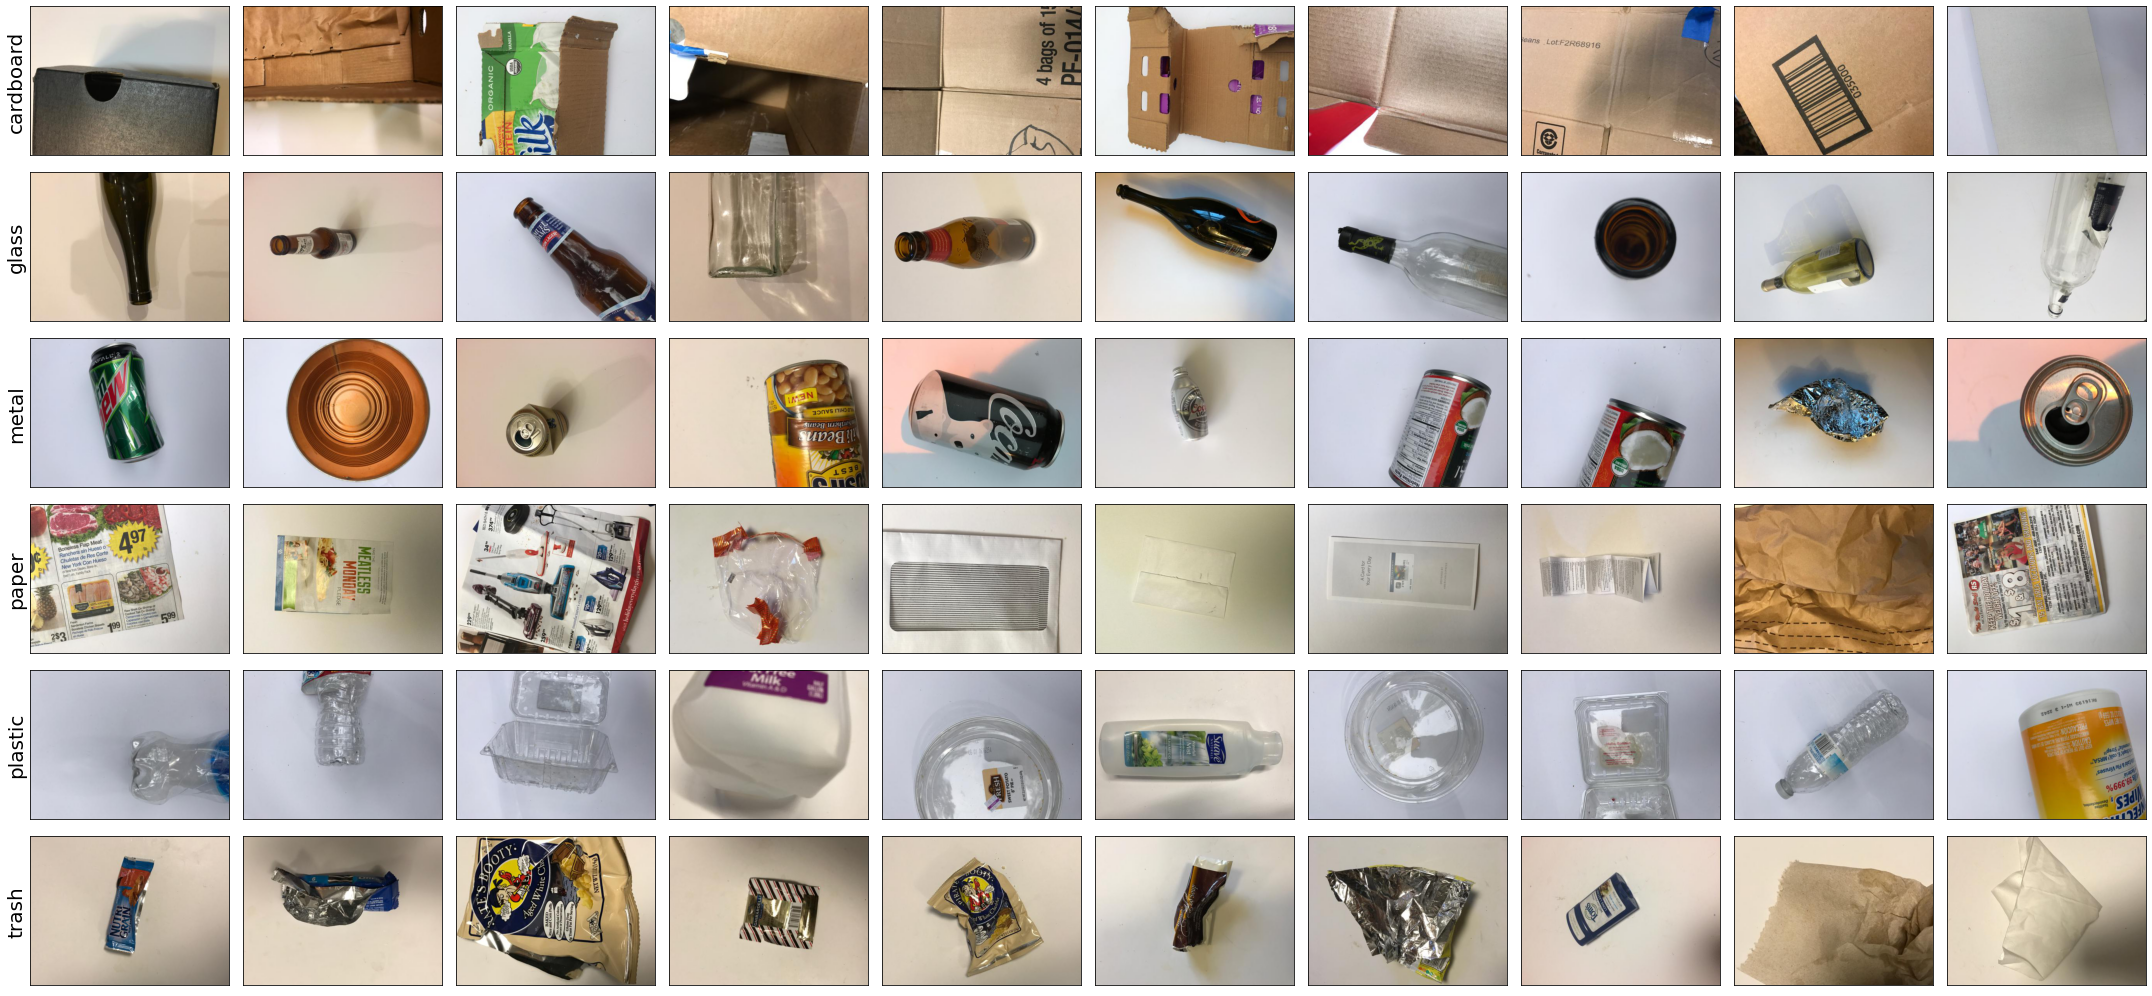

In [ ]:
plt.figure(figsize=(30,14))

for i in range(6):
    directory = os.path.join(train_dir, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = matplotlib.image.imread(path)
        
        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [ ]:
directory = os.path.join(train_dir, 'cardboard')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(384, 512, 3)

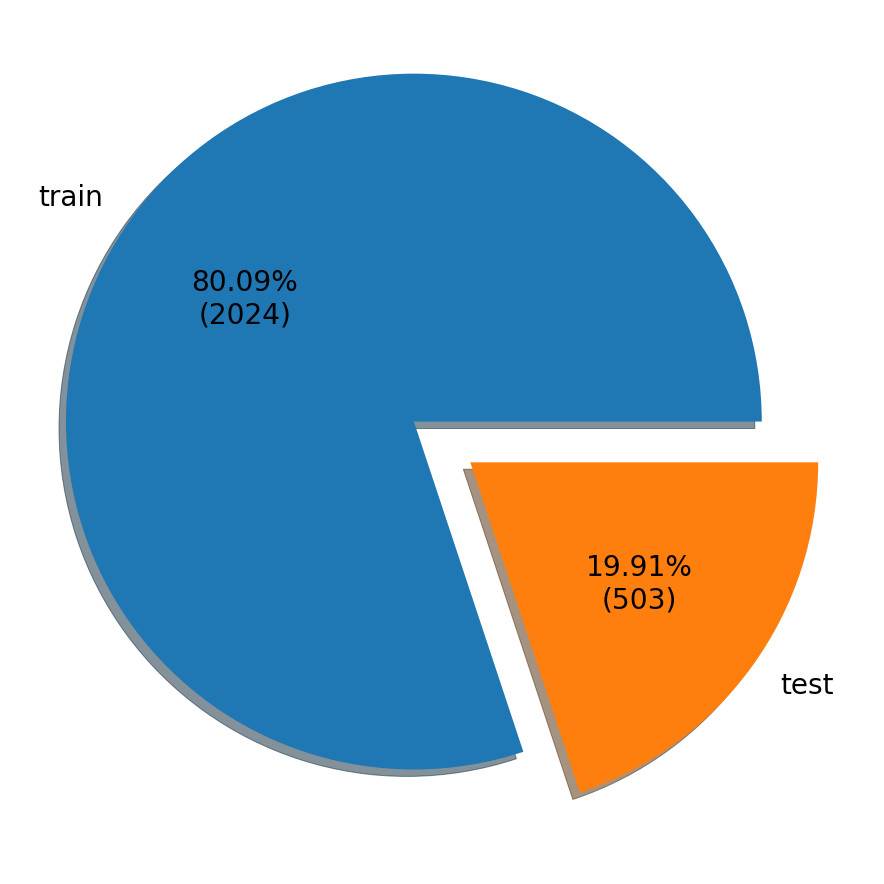

In [ ]:
train_size, test_size = 2024, 503

def func(v, p):
    a = p * sum(v) / 100
    return "{:.2f}%\n({:.0f})".format(p, a)

sizes = [train_size, test_size]
explode = (0.1, 0.1)
fig, ax = plt.subplots(figsize=(32, 16))
ax.pie(sizes, explode=explode, labels=['train', 'test'], textprops={'fontsize': 28}, autopct=lambda p: func(sizes, p), shadow=True)
# fig.suptitle('Defect Distribution', fontsize=25, fontweight='bold')
# fig.set_facecolor("tan")
plt.show()


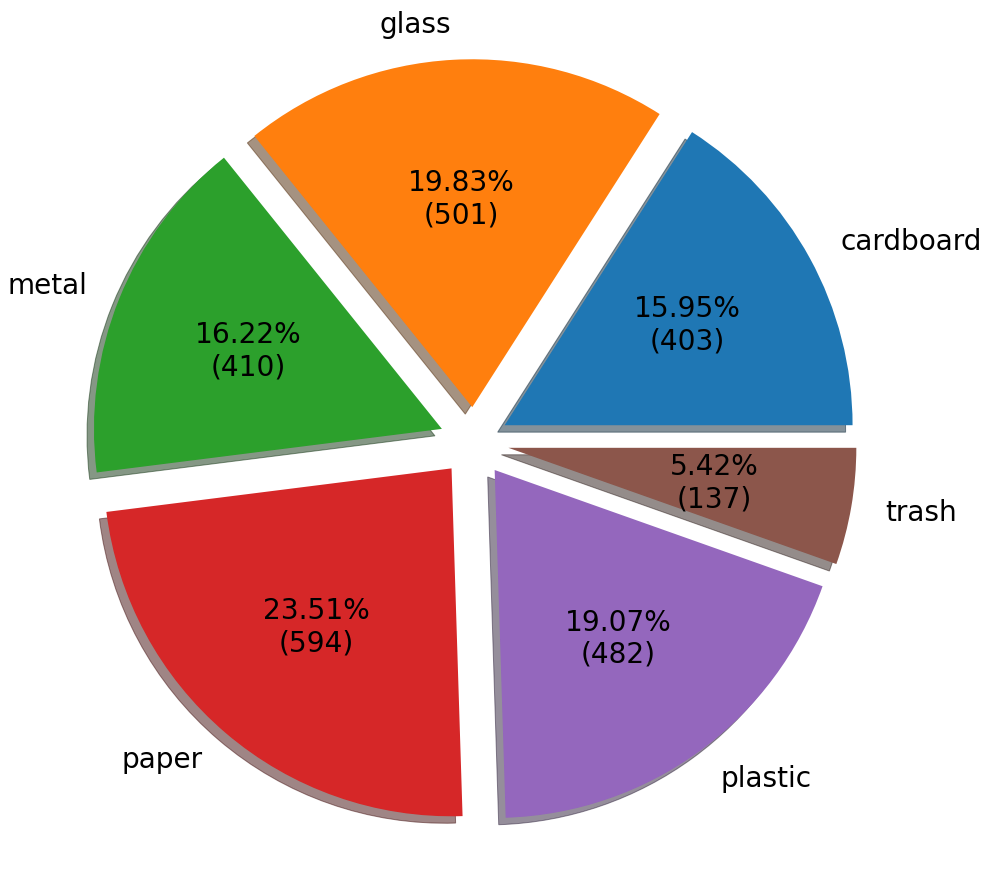

In [ ]:
def func(v, p):
    a = p * sum(v) / 100
    return "{:.2f}%\n({:.0f})".format(p, a)

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
fig, ax = plt.subplots(figsize=(32, 16))
ax.pie(values, explode=explode, labels=labels, textprops={'fontsize': 28}, autopct=lambda p: func(values, p), shadow=True)
# fig.suptitle('Defect Distribution', fontsize=25, fontweight='bold')
# fig.set_facecolor("tan")
plt.show()


In [ ]:
import time 

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [ ]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
import sklearn

METRICS = [
           tf.keras.metrics.BinaryAccuracy(name="accuracy"),
           tf.keras.metrics.Precision(name="precision"),
           tf.keras.metrics.Recall(name="recall"),
           tf.keras.metrics.AUC(name="auc"),
           f1_score
]

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1, factor = 0.50, min_lr = 1e-10)
mcp = ModelCheckpoint('model.h5')
es = EarlyStopping(verbose=1, patience=20)
time_callback = TimeHistory()

In [ ]:
our_shape = (94, 128, 3)

In [ ]:
sum(values)

2527

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True,
                                   rotation_range=15, zoom_range=0.1,
                                   width_shift_range=0.15, height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1. / 255.,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(our_shape[0], our_shape[1]), batch_size=32,
                                                    class_mode='categorical', subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(our_shape[0], our_shape[1]), batch_size=32,
                                                         class_mode='categorical', subset='validation')

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:
# train_datagen = ImageDataGenerator(rescale=1. / 255., validation_split=0.2)

# train_generator = train_datagen.flow_from_directory(train_dir, target_size=(our_shape[0], our_shape[1]), batch_size=32,
#                                                     class_mode='categorical', subset='training')
# validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(our_shape[0], our_shape[1]), batch_size=32,
#                                                          class_mode='categorical', subset='validation')

In [ ]:
epochs = 30

## Normal

In [ ]:
normal_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=our_shape),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(6, activation='softmax')
])

normal_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 92, 126, 32)       896       
                                                                 
 batch_normalization_8 (Batc  (None, 92, 126, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 46, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_20 (Dropout)        (None, 46, 63, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 44, 61, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 44, 61, 64)      

In [ ]:
normal_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics=METRICS)

In [ ]:
normal_history = normal_model.fit(train_generator, epochs=epochs, verbose=1, validation_data=validation_generator, callbacks=[lrd, mcp, es, time_callback])

Epoch 1/30
64/64 [==============================] - 26s 370ms/step - loss: 1.9623 - accuracy: 0.8216 - precision: 0.4503 - recall: 0.3177 - auc: 0.7259 - f1_score: 0.3690 - val_loss: 1.8968 - val_accuracy: 0.8333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5016 - val_f1_score: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/30
64/64 [==============================] - 22s 352ms/step - loss: 1.5396 - accuracy: 0.8486 - precision: 0.5622 - recall: 0.4130 - auc: 0.8073 - f1_score: 0.4765 - val_loss: 2.6172 - val_accuracy: 0.7359 - val_precision: 0.2024 - val_recall: 0.1988 - val_auc: 0.5350 - val_f1_score: 0.2006 - lr: 1.0000e-04
Epoch 3/30
64/64 [==============================] - 23s 352ms/step - loss: 1.4344 - accuracy: 0.8524 - precision: 0.5764 - recall: 0.4303 - auc: 0.8271 - f1_score: 0.4955 - val_loss: 2.2046 - val_accuracy: 0.8327 - val_precision: 0.3333 - val_recall: 0.0040 - val_auc: 0.5853 - val_f1_score: 0.0076 - lr: 1.0000e-04
Epoch 4/30
64/64 [======================

In [ ]:
normal_times = time_callback.times
print(normal_times)

[25.625288009643555, 22.484331369400024, 22.53347635269165, 22.228372812271118, 22.47378396987915, 22.43808889389038, 22.085304498672485, 22.258683681488037, 22.620993614196777, 22.387694835662842, 22.45067548751831, 22.17971897125244, 22.13285255432129, 22.096797943115234, 22.073053121566772, 22.110654830932617, 22.043090105056763, 22.03459858894348, 22.490960121154785, 22.46641445159912, 22.62939453125, 22.7024986743927, 23.096996545791626, 22.447691440582275, 22.58526110649109, 22.592342376708984, 22.67954730987549, 22.772298336029053, 22.505332231521606, 23.2590069770813]


In [ ]:
with open(f'{main_dir}/normal_epoch_{epochs}_94_128.pkl', 'wb') as file_pi:
        pickle.dump(normal_history.history, file_pi)

In [ ]:
normal_model.save(f'{main_dir}/model_normal_epoch_{epochs}_94_128')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/deep-learning-final/dataset//model_normal_epoch_30_94_128/assets


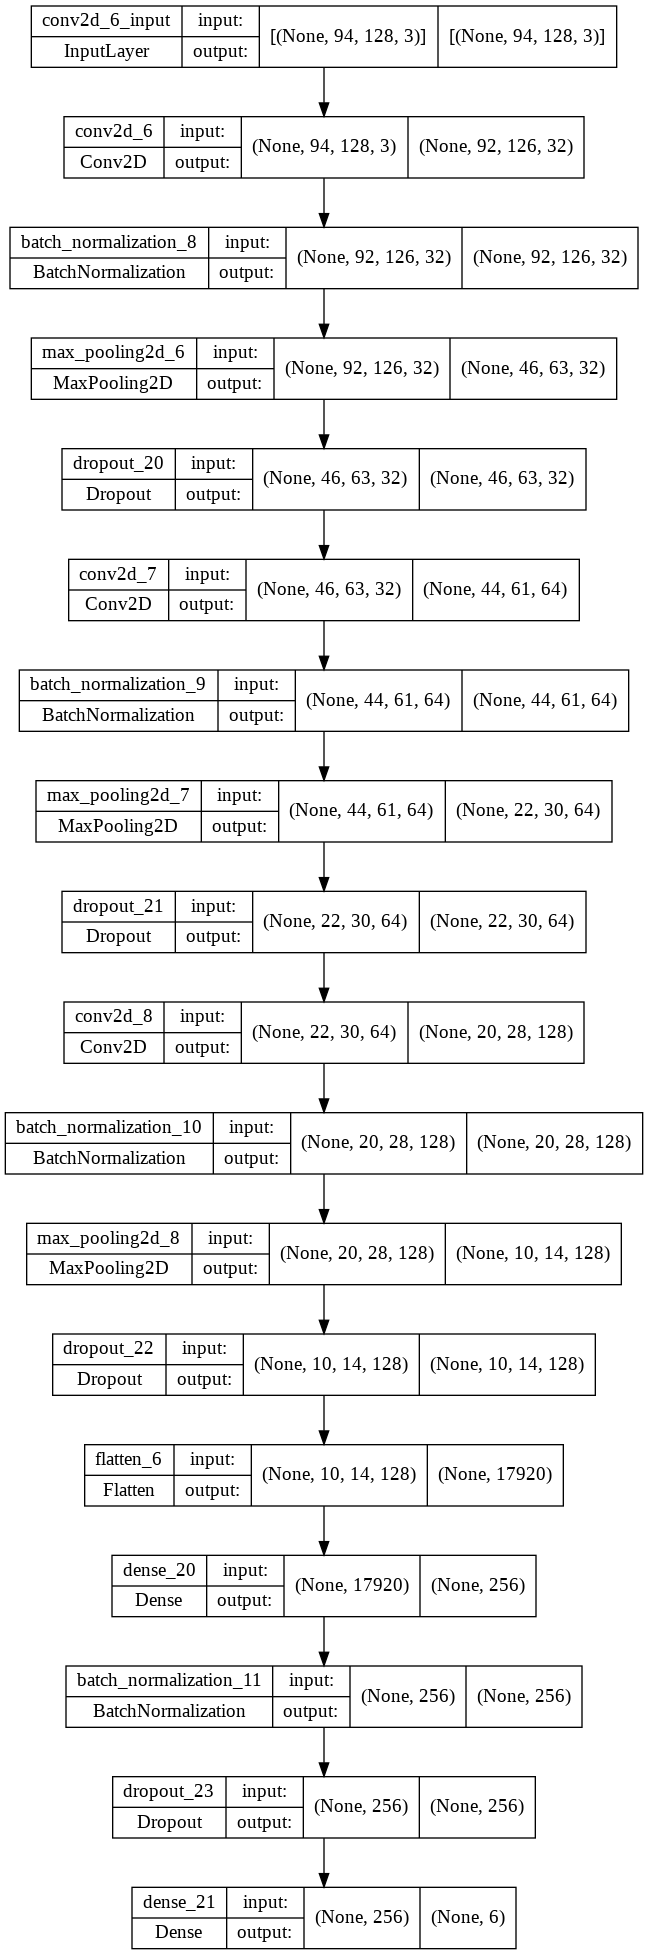

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(normal_model, to_file="normal.png", show_shapes=True, show_layer_names=True)
Image(filename="normal.png")

## VGG16

In [ ]:
vgg16 = tf.keras.applications.VGG16(input_shape=our_shape, include_top=False, weights="imagenet")
vgg16.trainable = False

In [ ]:
vgg16_model = Sequential()
vgg16_model.add(vgg16)
vgg16_model.add(Dropout(0.5))
vgg16_model.add(Flatten())
vgg16_model.add(Dense(256, activation="relu"))
vgg16_model.add(Dropout(0.3))
vgg16_model.add(Dense(128, activation="relu"))
vgg16_model.add(Dropout(0.3))
vgg16_model.add(Dense(256, activation="relu"))
vgg16_model.add(Dense(6, activation="softmax"))

In [ ]:
vgg16_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 4, 512)         14714688  
                                                                 
 dropout_24 (Dropout)        (None, 2, 4, 512)         0         
                                                                 
 flatten_7 (Flatten)         (None, 4096)              0         
                                                                 
 dense_22 (Dense)            (None, 256)               1048832   
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dropout_26 (Dropout)        (None, 128)             

In [ ]:
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=METRICS)

In [ ]:
vgg16_history = vgg16_model.fit(train_generator, epochs=epochs, verbose=1, validation_data=validation_generator, callbacks=[lrd, mcp, es, time_callback])

Epoch 1/30
64/64 [==============================] - 28s 405ms/step - loss: 1.7917 - accuracy: 0.8421 - precision: 0.6684 - recall: 0.1045 - auc: 0.6583 - f1_score: 0.0094 - val_loss: 1.6693 - val_accuracy: 0.8333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7041 - val_f1_score: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/30
64/64 [==============================] - 24s 373ms/step - loss: 1.6766 - accuracy: 0.8337 - precision: 0.6471 - recall: 0.0054 - auc: 0.6590 - f1_score: 0.0104 - val_loss: 1.5819 - val_accuracy: 0.8333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7590 - val_f1_score: 0.0000e+00 - lr: 1.0000e-04
Epoch 3/30
64/64 [==============================] - 24s 368ms/step - loss: 1.6064 - accuracy: 0.8341 - precision: 0.5692 - recall: 0.0183 - auc: 0.7029 - f1_score: 0.0340 - val_loss: 1.4824 - val_accuracy: 0.8363 - val_precision: 0.9091 - val_recall: 0.0199 - val_auc: 0.7832 - val_f1_score: 0.0399 - lr: 1.0000e-04
Epoch 4/30
64/64 [==========

In [ ]:
vgg16_times = time_callback.times
print(vgg16_times)

[27.884911060333252, 23.885551691055298, 23.589937686920166, 23.749910593032837, 24.118998527526855, 23.25997233390808, 22.987895488739014, 23.033934354782104, 22.908260822296143, 22.816978216171265, 22.647523880004883, 23.77437138557434, 24.425971508026123, 24.375364780426025, 23.169084548950195, 23.533876657485962, 22.920690298080444, 23.724812984466553, 23.998682260513306, 24.048303604125977, 24.581251621246338, 24.533453941345215, 23.60667371749878, 22.766701459884644, 23.269551753997803, 22.967191696166992, 22.920933723449707, 23.02967119216919, 23.24271583557129, 23.274264574050903]


In [ ]:
with open(f'{main_dir}/vgg16_epoch_{epochs}_94_128.pkl', 'wb') as file_pi:
        pickle.dump(vgg16_history.history, file_pi)

In [ ]:
vgg16_model.save(f'{main_dir}/model_vgg16_epoch_{epochs}_94_128')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/deep-learning-final/dataset//model_vgg16_epoch_30_94_128/assets


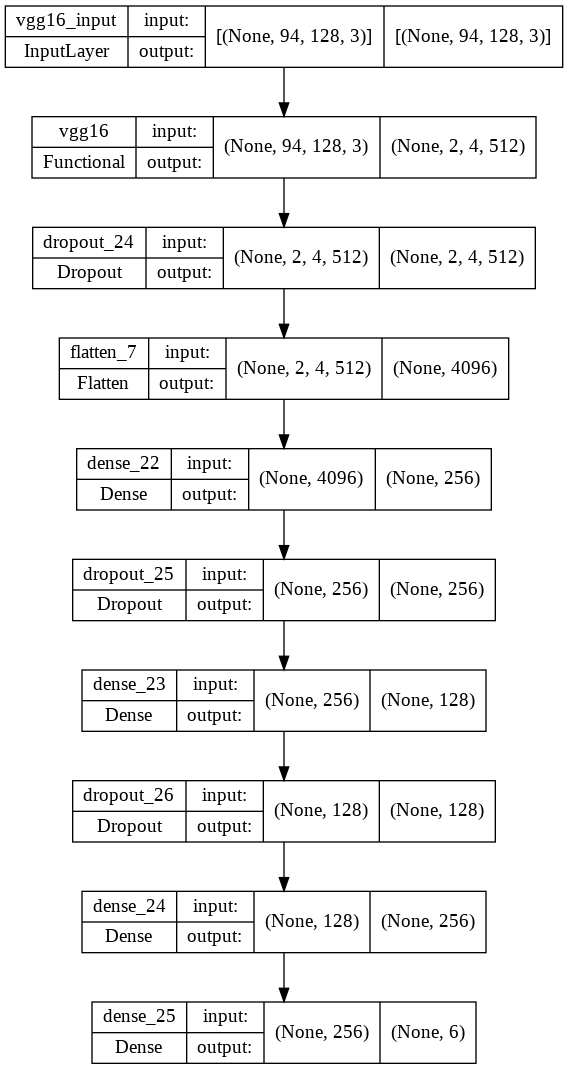

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(vgg16_model, to_file="vgg16.png", show_shapes=True, show_layer_names=True)
Image(filename="vgg16.png")

## Densnet121

In [ ]:
densnet121 = tf.keras.applications.DenseNet121(input_shape=our_shape, include_top=False, weights="imagenet")
densnet121.trainable = False

In [ ]:
densnet121_model = Sequential()
densnet121_model.add(densnet121)
densnet121_model.add(Dropout(0.5))
densnet121_model.add(Flatten())
densnet121_model.add(Dense(256, activation="relu"))
densnet121_model.add(Dropout(0.3))
densnet121_model.add(Dense(128, activation="relu"))
densnet121_model.add(Dropout(0.3))
densnet121_model.add(Dense(256, activation="relu"))
densnet121_model.add(Dense(6, activation="softmax"))

In [ ]:
densnet121_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 3, 4, 1024)        7037504   
                                                                 
 dropout_27 (Dropout)        (None, 3, 4, 1024)        0         
                                                                 
 flatten_8 (Flatten)         (None, 12288)             0         
                                                                 
 dense_26 (Dense)            (None, 256)               3145984   
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dropout_29 (Dropout)        (None, 128)             

In [ ]:
densnet121_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=METRICS)

In [ ]:
densnet121_history = densnet121_model.fit(train_generator, epochs=epochs, verbose=1, validation_data=validation_generator, callbacks=[lrd, mcp, es, time_callback])

Epoch 1/30
64/64 [==============================] - 37s 429ms/step - loss: 1.8893 - accuracy: 0.8273 - precision: 0.4563 - recall: 0.1899 - auc: 0.7104 - f1_score: 0.1752 - val_loss: 1.3221 - val_accuracy: 0.8516 - val_precision: 0.8090 - val_recall: 0.1431 - val_auc: 0.8435 - val_f1_score: 0.2402 - lr: 1.0000e-04
Epoch 2/30
64/64 [==============================] - 24s 380ms/step - loss: 1.4341 - accuracy: 0.8434 - precision: 0.5730 - recall: 0.2367 - auc: 0.7852 - f1_score: 0.3296 - val_loss: 1.1349 - val_accuracy: 0.8691 - val_precision: 0.7700 - val_recall: 0.3062 - val_auc: 0.8788 - val_f1_score: 0.4319 - lr: 1.0000e-04
Epoch 3/30
64/64 [==============================] - 24s 375ms/step - loss: 1.2255 - accuracy: 0.8619 - precision: 0.6529 - recall: 0.3661 - auc: 0.8475 - f1_score: 0.4630 - val_loss: 1.0221 - val_accuracy: 0.8820 - val_precision: 0.7838 - val_recall: 0.4036 - val_auc: 0.8974 - val_f1_score: 0.5320 - lr: 1.0000e-04
Epoch 4/30
64/64 [==============================] - 

In [ ]:
densnet121_times = time_callback.times
print(densnet121_times)

[36.720519065856934, 24.291837453842163, 24.030306816101074, 23.994030475616455, 23.97434973716736, 24.177500247955322, 24.127567529678345, 24.00487494468689, 23.891688108444214, 23.702794790267944, 24.05039954185486, 24.163570642471313, 24.059561729431152, 23.96834135055542, 23.799880504608154, 23.863489389419556, 23.95099949836731, 23.773410081863403, 23.88977360725403, 24.215283393859863, 24.24241280555725, 24.376564741134644, 24.602707147598267, 24.779277801513672, 24.72525954246521, 24.059563159942627, 23.99679923057556, 23.879305124282837, 23.871793746948242, 24.230336904525757]


In [ ]:
with open(f'{main_dir}/densnet121_epoch_{epochs}_94_128.pkl', 'wb') as file_pi:
        pickle.dump(densnet121_history.history, file_pi)

In [ ]:
densnet121_model.save(f'{main_dir}/model_densnet121_epoch_{epochs}_94_128')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/deep-learning-final/dataset//model_densnet121_epoch_30_94_128/assets


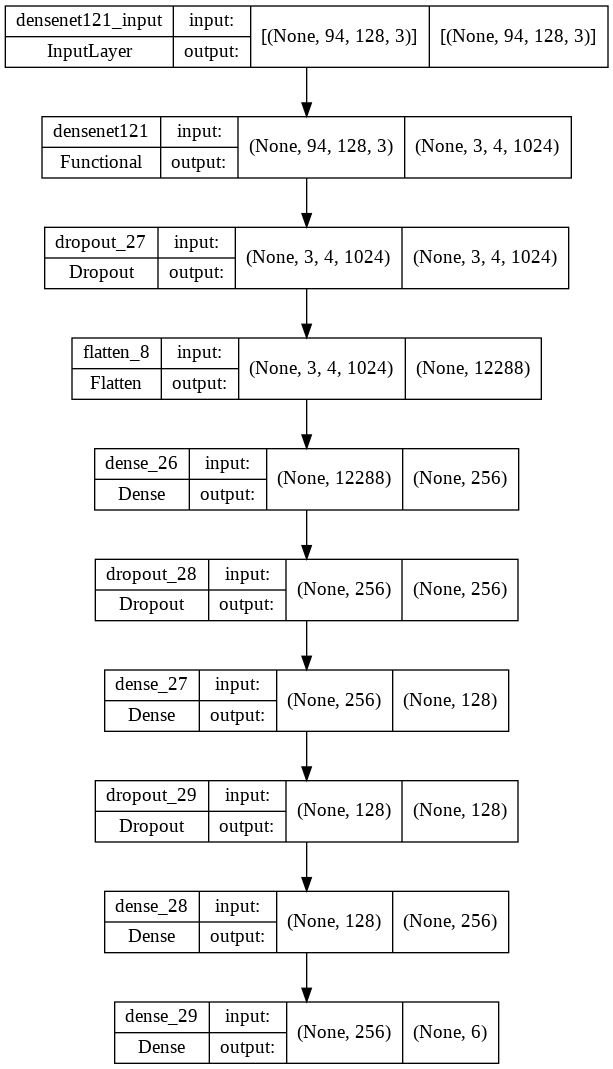

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(densnet121_model, to_file="densnet121.png", show_shapes=True, show_layer_names=True)
Image(filename="densnet121.png")

## Common

In [ ]:
normal_times

[25.625288009643555,
 22.484331369400024,
 22.53347635269165,
 22.228372812271118,
 22.47378396987915,
 22.43808889389038,
 22.085304498672485,
 22.258683681488037,
 22.620993614196777,
 22.387694835662842,
 22.45067548751831,
 22.17971897125244,
 22.13285255432129,
 22.096797943115234,
 22.073053121566772,
 22.110654830932617,
 22.043090105056763,
 22.03459858894348,
 22.490960121154785,
 22.46641445159912,
 22.62939453125,
 22.7024986743927,
 23.096996545791626,
 22.447691440582275,
 22.58526110649109,
 22.592342376708984,
 22.67954730987549,
 22.772298336029053,
 22.505332231521606,
 23.2590069770813]

In [ ]:
vgg16_times

[27.884911060333252,
 23.885551691055298,
 23.589937686920166,
 23.749910593032837,
 24.118998527526855,
 23.25997233390808,
 22.987895488739014,
 23.033934354782104,
 22.908260822296143,
 22.816978216171265,
 22.647523880004883,
 23.77437138557434,
 24.425971508026123,
 24.375364780426025,
 23.169084548950195,
 23.533876657485962,
 22.920690298080444,
 23.724812984466553,
 23.998682260513306,
 24.048303604125977,
 24.581251621246338,
 24.533453941345215,
 23.60667371749878,
 22.766701459884644,
 23.269551753997803,
 22.967191696166992,
 22.920933723449707,
 23.02967119216919,
 23.24271583557129,
 23.274264574050903]

In [ ]:
densnet121_times

[36.720519065856934,
 24.291837453842163,
 24.030306816101074,
 23.994030475616455,
 23.97434973716736,
 24.177500247955322,
 24.127567529678345,
 24.00487494468689,
 23.891688108444214,
 23.702794790267944,
 24.05039954185486,
 24.163570642471313,
 24.059561729431152,
 23.96834135055542,
 23.799880504608154,
 23.863489389419556,
 23.95099949836731,
 23.773410081863403,
 23.88977360725403,
 24.215283393859863,
 24.24241280555725,
 24.376564741134644,
 24.602707147598267,
 24.779277801513672,
 24.72525954246521,
 24.059563159942627,
 23.99679923057556,
 23.879305124282837,
 23.871793746948242,
 24.230336904525757]

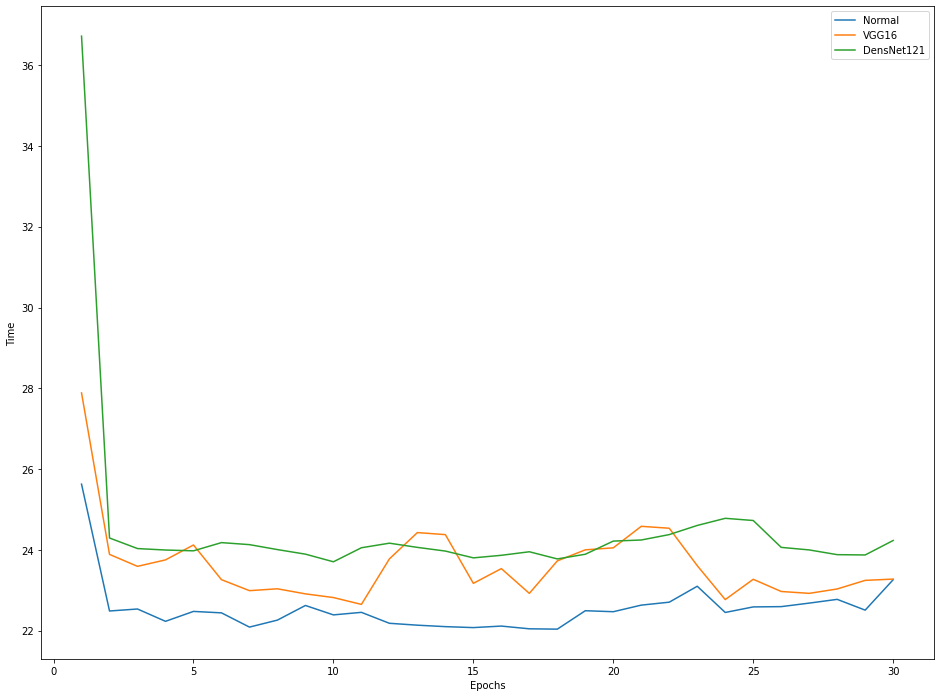

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12))

ax.plot(range(1, len(normal_times) + 1), normal_times)
ax.plot(range(1, len(vgg16_times) + 1), vgg16_times)
ax.plot(range(1, len(densnet121_times) + 1), densnet121_times)

ax.set_xlabel('Epochs')
ax.set_ylabel('Time')
ax.legend(['Normal', 'VGG16', 'DensNet121'])

plt.show()

In [ ]:
normal_history_loaded = pickle.load(open(f'{main_dir}/normal_epoch_{epochs}_94_128.pkl', "rb"))

In [ ]:
vgg16_history_loaded = pickle.load(open(f'{main_dir}/vgg16_epoch_{epochs}_94_128.pkl', "rb"))

In [ ]:
densnet121_history_loaded = pickle.load(open(f'{main_dir}/densnet121_epoch_{epochs}_94_128.pkl', "rb"))

In [ ]:
normal_history_loaded['accuracy'][-1]

0.9098319411277771

In [ ]:
vgg16_history_loaded['accuracy'][-1]

0.8848813772201538

In [ ]:
densnet121_history_loaded['accuracy'][-1]

0.9281126856803894

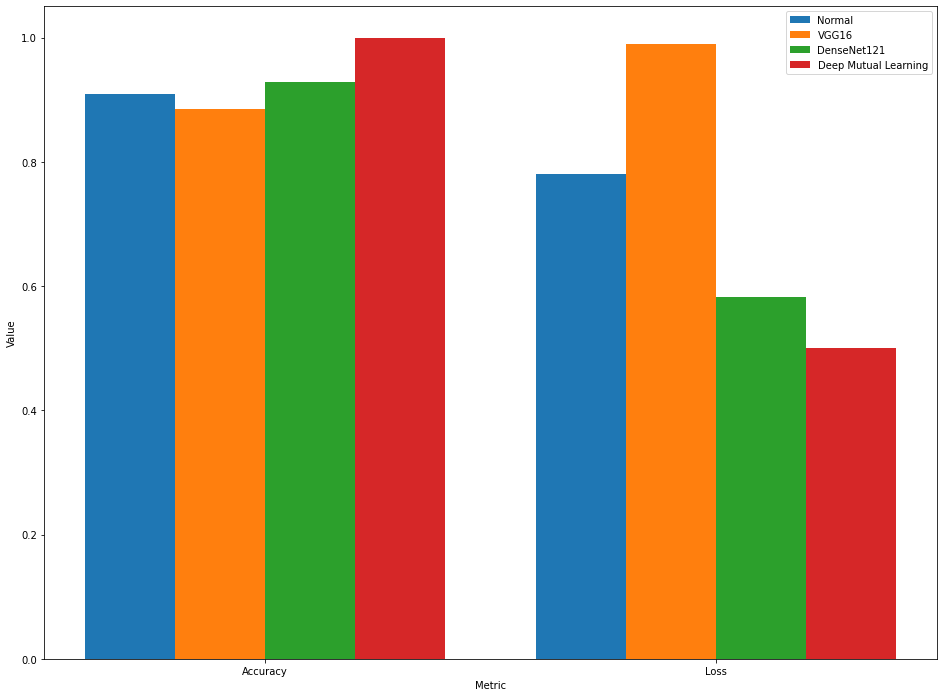

In [ ]:
m = ['Accuracy', 'Loss']
fig, ax = plt.subplots(figsize=(16, 12))

X_axis = np.arange(len(m))

ax.bar(X_axis - 0.3, [normal_history_loaded['accuracy'][-1], normal_history_loaded['loss'][-1]], 0.2)
ax.bar(X_axis - 0.1, [vgg16_history_loaded['accuracy'][-1], vgg16_history_loaded['loss'][-1]], 0.2)
ax.bar(X_axis + 0.1, [densnet121_history_loaded['accuracy'][-1], densnet121_history_loaded['loss'][-1]], 0.2)
ax.bar(X_axis + 0.3, [1, 0.50], 0.2)

plt.xticks(X_axis, m)

ax.set_xlabel('Metric')
ax.set_ylabel('Value')
ax.legend(['Normal', 'VGG16', 'DenseNet121', "Deep Mutual Learning"])

plt.show()

In [ ]:
legends = ['Normal - training', 'Normal - validation', 'VGG16 - training', 'VGG16 - validation', 'DensNet121 - training', 'DensNet121 - validation']

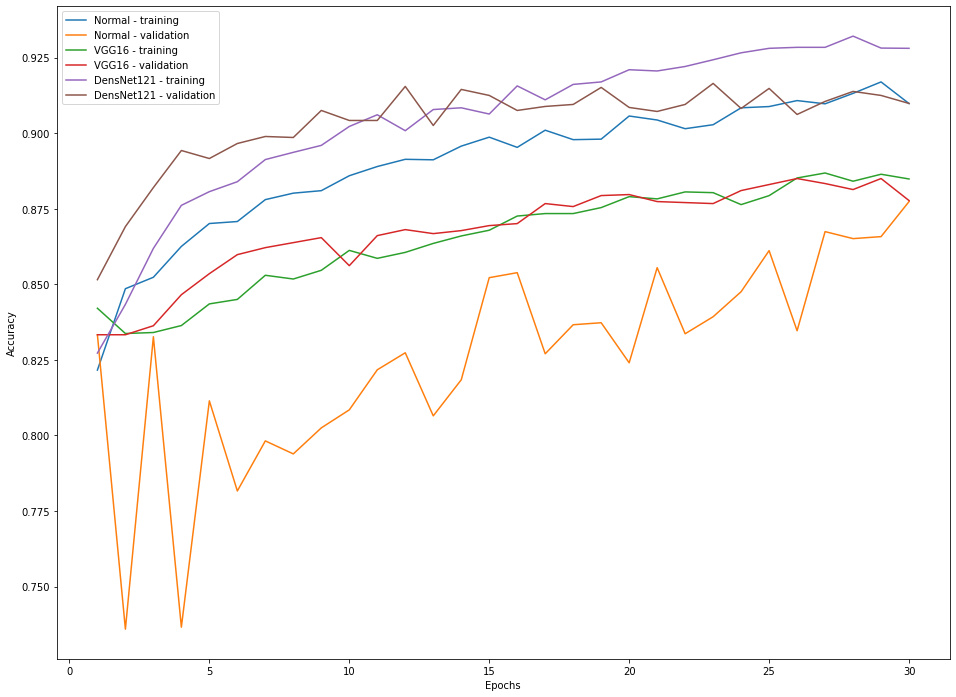

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12))

acc, val_acc = normal_history_loaded['accuracy'], normal_history_loaded['val_accuracy']
ax.plot(range(1, len(acc) + 1), acc)
ax.plot(range(1, len(val_acc) + 1), val_acc)

acc, val_acc = vgg16_history_loaded['accuracy'], vgg16_history_loaded['val_accuracy']
ax.plot(range(1, len(acc) + 1), acc)
ax.plot(range(1, len(val_acc) + 1), val_acc)

acc, val_acc = densnet121_history_loaded['accuracy'], densnet121_history_loaded['val_accuracy']
ax.plot(range(1, len(acc) + 1), acc)
ax.plot(range(1, len(val_acc) + 1), val_acc)

ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend(legends)

plt.show()

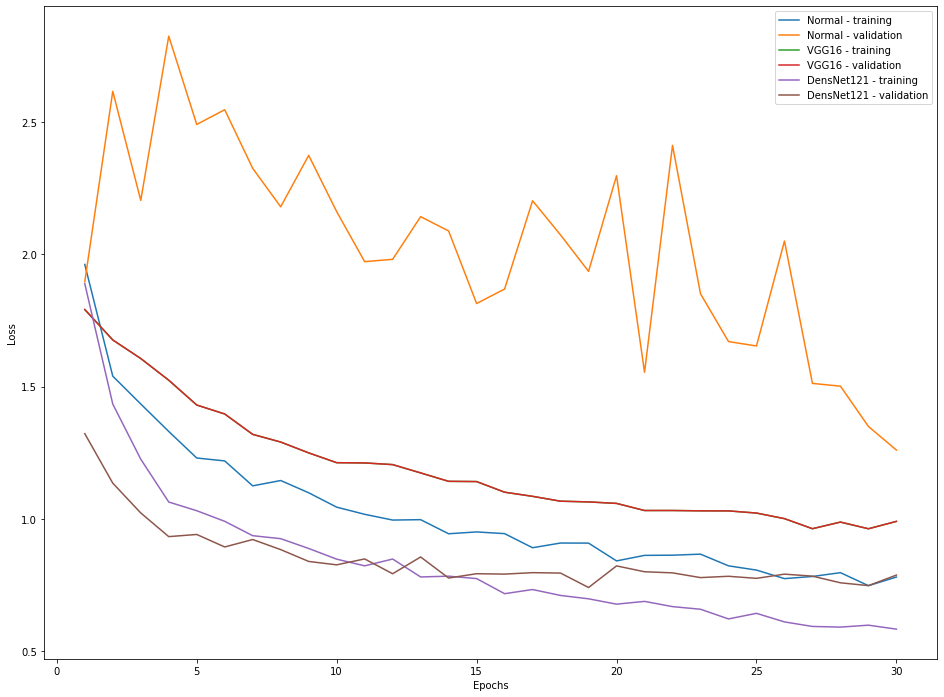

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12))

loss, val_loss = normal_history_loaded['loss'], normal_history_loaded['val_loss']
ax.plot(range(1, len(loss) + 1), loss)
ax.plot(range(1, len(val_loss) + 1), val_loss)

acc, val_acc = vgg16_history_loaded['loss'], vgg16_history_loaded['loss']
ax.plot(range(1, len(acc) + 1), acc)
ax.plot(range(1, len(val_acc) + 1), val_acc)

loss, val_loss = densnet121_history_loaded['loss'], densnet121_history_loaded['val_loss']
ax.plot(range(1, len(loss) + 1), loss)
ax.plot(range(1, len(val_loss) + 1), val_loss)

ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend(legends)

plt.show()

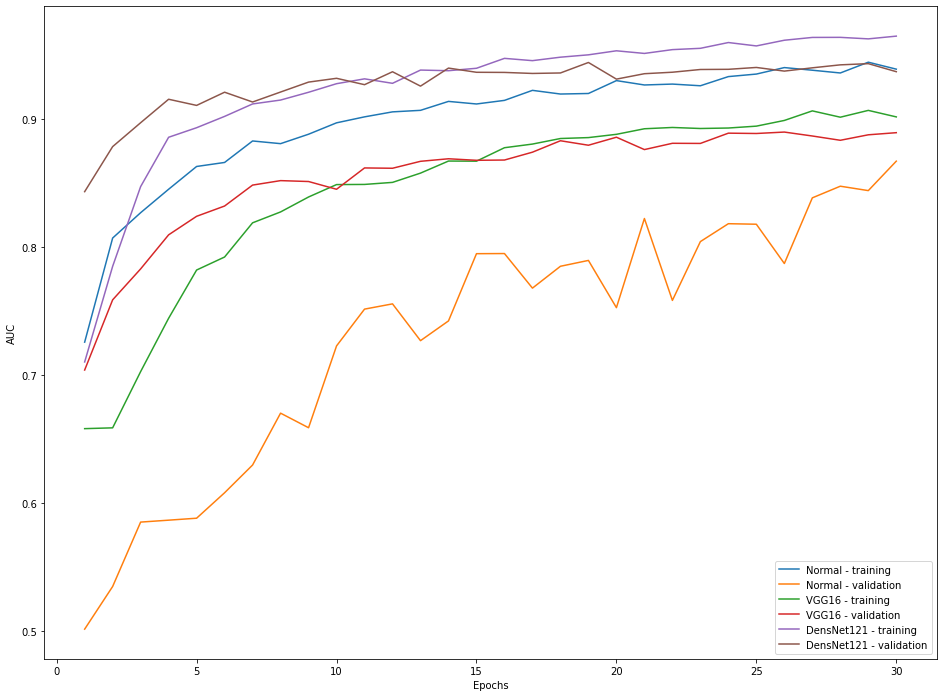

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12))

loss, val_loss = normal_history_loaded['auc'], normal_history_loaded['val_auc']
ax.plot(range(1, len(loss) + 1), loss)
ax.plot(range(1, len(val_loss) + 1), val_loss)

acc, val_acc = vgg16_history_loaded['auc'], vgg16_history_loaded['val_auc']
ax.plot(range(1, len(acc) + 1), acc)
ax.plot(range(1, len(val_acc) + 1), val_acc)

auc, val_auc = densnet121_history_loaded['auc'], densnet121_history_loaded['val_auc']
ax.plot(range(1, len(auc) + 1), auc)
ax.plot(range(1, len(val_auc) + 1), val_auc)

ax.set_xlabel('Epochs')
ax.set_ylabel('AUC')
ax.legend(legends)

plt.show()

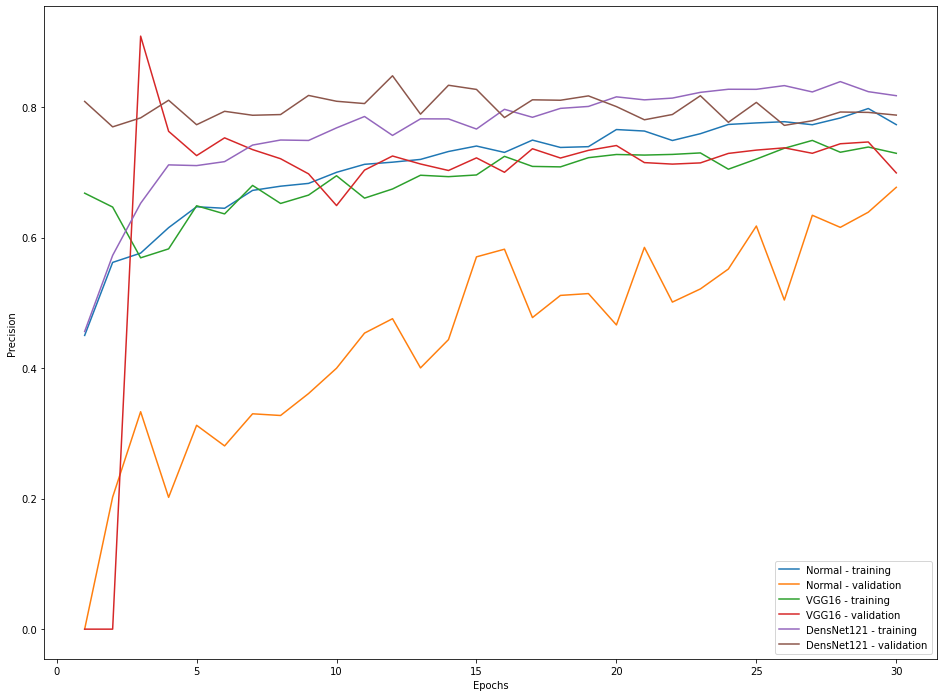

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12))

loss, val_loss = normal_history_loaded['precision'], normal_history_loaded['val_precision']
ax.plot(range(1, len(loss) + 1), loss)
ax.plot(range(1, len(val_loss) + 1), val_loss)

acc, val_acc = vgg16_history_loaded['precision'], vgg16_history_loaded['val_precision']
ax.plot(range(1, len(acc) + 1), acc)
ax.plot(range(1, len(val_acc) + 1), val_acc)

precision, val_precision = densnet121_history_loaded['precision'], densnet121_history_loaded['val_precision']
ax.plot(range(1, len(precision) + 1), precision)
ax.plot(range(1, len(val_precision) + 1), val_precision)

ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
ax.legend(legends)

plt.show()

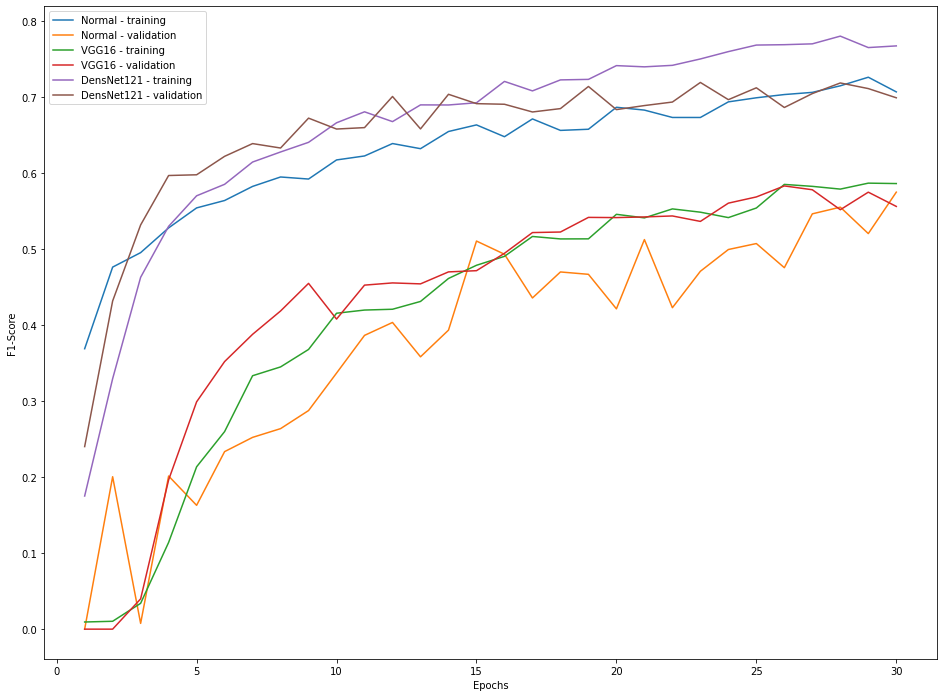

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12))

loss, val_loss = normal_history_loaded['f1_score'], normal_history_loaded['val_f1_score']
ax.plot(range(1, len(loss) + 1), loss)
ax.plot(range(1, len(val_loss) + 1), val_loss)

acc, val_acc = vgg16_history_loaded['f1_score'], vgg16_history_loaded['val_f1_score']
ax.plot(range(1, len(acc) + 1), acc)
ax.plot(range(1, len(val_acc) + 1), val_acc)

f1, val_f1 = densnet121_history_loaded['f1_score'], densnet121_history_loaded['val_f1_score']
ax.plot(range(1, len(f1) + 1), f1)
ax.plot(range(1, len(val_f1) + 1), val_f1)

ax.set_xlabel('Epochs')
ax.set_ylabel('F1-Score')
ax.legend(legends)

plt.show()

## Test

In [ ]:
evaluate_normal = normal_model.evaluate(validation_generator)

16/16 [==============================] - 4s 274ms/step - loss: 1.2950 - accuracy: 0.8681 - precision: 0.6438 - recall: 0.4672 - auc: 0.8569 - f1_score: 0.5412


In [ ]:
evaluate_normal

[1.295045018196106,
 0.8681246042251587,
 0.6438356041908264,
 0.46719682216644287,
 0.8569129705429077,
 0.5411985516548157]

In [ ]:
evaluate_vgg16 = vgg16_model.evaluate(validation_generator)

16/16 [==============================] - 5s 307ms/step - loss: 1.0381 - accuracy: 0.8860 - precision: 0.7573 - recall: 0.4652 - auc: 0.8919 - f1_score: 0.5769


In [ ]:
evaluate_vgg16

[1.0380595922470093,
 0.8860173225402832,
 0.7572815418243408,
 0.4652087390422821,
 0.8918741345405579,
 0.5768874883651733]

In [ ]:
evaluate_densnet121 = densnet121_model.evaluate(validation_generator)

16/16 [==============================] - 6s 348ms/step - loss: 0.7854 - accuracy: 0.9158 - precision: 0.8029 - recall: 0.6561 - auc: 0.9392 - f1_score: 0.7231


In [ ]:
evaluate_densnet121

[0.7853526473045349,
 0.9158382415771484,
 0.8029196858406067,
 0.6560636162757874,
 0.9392468929290771,
 0.7230699062347412]

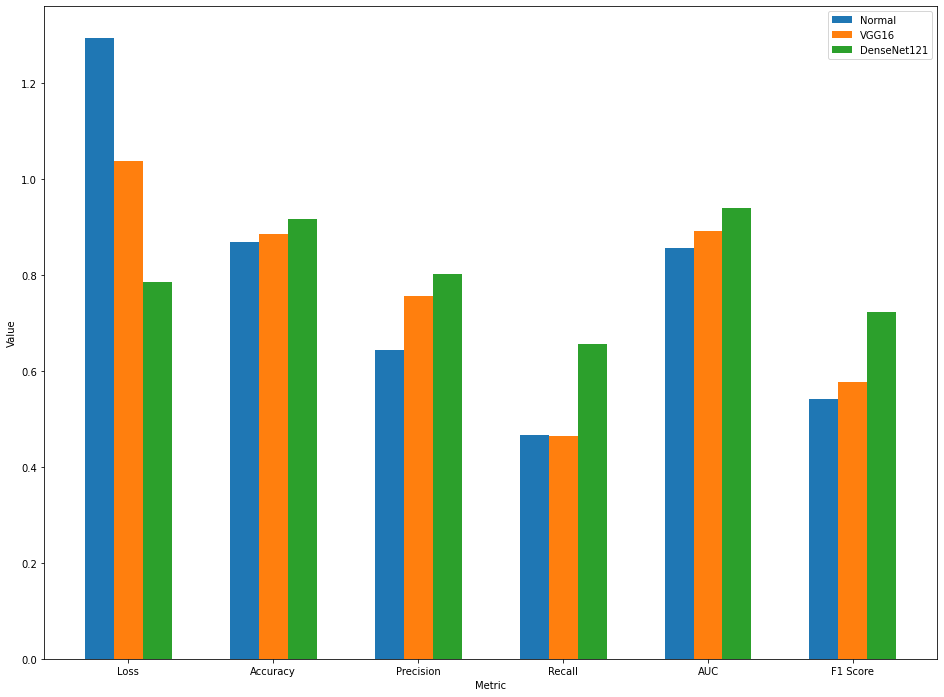

In [ ]:
m = ['Loss', 'Accuracy', 'Precision', 'Recall', 'AUC', 'F1 Score']
fig, ax = plt.subplots(figsize=(16, 12))

X_axis = np.arange(len(m))

ax.bar(X_axis - 0.2, evaluate_normal, 0.2)
ax.bar(X_axis, evaluate_vgg16, 0.2)
ax.bar(X_axis + 0.2, evaluate_densnet121, 0.2)

plt.xticks(X_axis, m)

ax.set_xlabel('Metric')
ax.set_ylabel('Value')
ax.legend(['Normal', 'VGG16', 'DenseNet121'])

plt.show()

In [ ]:
! cat /proc/cpuinfo


processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [ ]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-3e23981e-5c0b-f56d-4172-64fee2375e9c)
